In [1]:
import os, cv2
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from IPython.display import display

In [3]:
eye_shape_result_files= ['result_bus_20240226-112104.csv', 'result_passenger_20240226-112405.csv', 'result_taxi_20240226-112648.csv', 'result_truck_20240226-112812.csv']

In [4]:
img_files_path_list = list()

for (path, dirs, files) in os.walk('d:\\drowsy_dataset\\image'):
    for filename in files:
        if os.path.splitext(filename)[1] == '.jpg':
            img_files_path_list.append(path+os.sep+filename)

img_files_path_list[0:5]

['d:\\drowsy_dataset\\image\\bus\\R_216_60_M\\R_216_60_M_01_M0_G1_C0_01.jpg',
 'd:\\drowsy_dataset\\image\\bus\\R_216_60_M\\R_216_60_M_01_M0_G1_C0_02.jpg',
 'd:\\drowsy_dataset\\image\\bus\\R_216_60_M\\R_216_60_M_01_M0_G1_C0_03.jpg',
 'd:\\drowsy_dataset\\image\\bus\\R_216_60_M\\R_216_60_M_01_M0_G1_C0_04.jpg',
 'd:\\drowsy_dataset\\image\\bus\\R_216_60_M\\R_216_60_M_01_M0_G1_C0_05.jpg']

In [5]:
train_eye_shape_dataset = pd.DataFrame()
test_eye_shape_dataset = pd.DataFrame()

for data_file in eye_shape_result_files:
    data = pd.read_csv('analysis_data' + os.sep + data_file)
    train_data, test_data = train_test_split(data, test_size=0.1, random_state=0)
    train_eye_shape_dataset = pd.concat([train_eye_shape_dataset, train_data])
    test_eye_shape_dataset = pd.concat([test_eye_shape_dataset, test_data])
    
train_eye_shape_dataset.drop(columns=['Unnamed: 0'], inplace=True)
test_eye_shape_dataset.drop(columns=['Unnamed: 0'], inplace=True)

train_eye_shape_dataset.reset_index(inplace=True, drop=True)
test_eye_shape_dataset.reset_index(inplace=True, drop=True)


In [5]:
data_columns = train_eye_shape_dataset.columns.to_list()[0:]
feature_column_names = data_columns[5:9]
target_column_names = [data_columns[38], data_columns[40]]

In [6]:
feature_column_names


['left_eye_pt1_x_pos',
 'left_eye_pt1_y_pos',
 'left_eye_pt2_x_pos',
 'left_eye_pt2_y_pos']

In [7]:
target_column_names


['left_eye_opened', 'right_eye_opened']

In [8]:
train_eye_shape_dataset

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt1_y_pos,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened
0,R_234_60_M_19_M1_G1_C0_03.jpg,211.0,434.0,483.0,910.0,261.0,599.0,304.0,610.0,377.0,...,587.82,425.23,616.64,1,1,1,1,1,1,1
1,R_218_50_M_17_M1_G0_C0_12.jpg,320.0,468.0,566.0,932.0,380.0,635.0,418.0,656.0,487.0,...,627.46,544.69,654.72,1,0,1,1,1,1,1
2,R_226_30_M_17_M1_G1_C1_17.jpg,284.0,506.0,600.0,942.0,370.0,633.0,396.0,647.0,478.0,...,629.95,523.56,651.35,1,1,1,1,1,1,1
3,R_231_50_M_09_M1_G0_C0_14.jpg,144.0,447.0,474.0,1013.0,209.0,669.0,228.0,695.0,295.0,...,656.88,369.80,691.17,1,0,1,1,1,1,1
4,R_230_40_M_19_M1_G1_C0_18.jpg,41.0,582.0,320.0,1028.0,169.0,685.0,199.0,730.0,194.0,...,705.04,240.05,732.24,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20796,R_620_60_M_03_M0_G0_C0_03.jpg,238.0,540.0,500.0,900.0,291.0,624.0,330.0,642.0,413.0,...,626.00,466.00,665.00,0,0,1,1,1,1,1
20797,R_635_50_M_11_M0_G0_C0_01.jpg,270.0,476.0,559.0,988.0,332.0,600.0,390.0,614.0,472.0,...,595.00,537.00,636.00,0,0,1,1,1,1,1
20798,R_625_20_M_04_M0_G0_C0_03.jpg,232.0,474.0,542.0,959.0,291.0,634.0,339.0,650.0,418.0,...,622.00,494.00,657.00,0,0,1,1,1,1,1
20799,R_629_40_M_11_M0_G1_C0_19.jpg,200.0,294.0,534.0,819.0,252.0,514.0,308.0,533.0,390.0,...,479.00,461.00,520.00,0,1,1,1,1,1,1


In [9]:
test_eye_shape_dataset

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt1_y_pos,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened
0,R_231_50_M_09_M1_G0_C0_03.jpg,226.0,505.0,538.0,964.0,319.0,632.0,338.0,657.0,409.0,...,659.53,478.52,693.83,1,0,1,1,1,1,1
1,R_237_40_M_20_M0_G0_C0_05.jpg,151.0,246.0,470.0,762.0,197.0,431.0,255.0,450.0,347.0,...,414.25,419.07,451.02,0,0,1,1,1,1,1
2,R_221_50_M_04_M1_G0_C0_15.jpg,151.0,522.0,416.0,972.0,245.0,636.0,277.0,656.0,330.0,...,677.20,385.39,711.52,1,0,1,1,0,1,1
3,R_221_50_M_12_M1_G0_C0_06.jpg,244.0,540.0,504.0,968.0,349.0,628.0,383.0,652.0,363.0,...,716.67,491.77,763.04,1,0,1,1,1,1,1
4,R_221_50_M_13_M1_G0_C0_02.jpg,190.0,571.0,464.0,981.0,304.0,640.0,320.0,667.0,278.0,...,732.69,443.64,772.16,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2308,R_623_40_M_15_M0_G1_C0_02.jpg,265.0,317.0,566.0,786.0,356.0,486.0,408.0,499.0,484.0,...,485.00,547.00,523.00,0,1,1,1,1,1,1
2309,R_632_50_M_19_M0_G1_C0_01.jpg,215.0,412.0,537.0,923.0,283.0,569.0,340.0,585.0,430.0,...,566.00,498.00,611.00,0,1,1,1,0,1,1
2310,R_614_20_M_10_M0_G1_C0_15.jpg,260.0,435.0,560.0,852.0,297.0,561.0,353.0,577.0,445.0,...,535.00,511.00,572.00,0,1,1,1,1,1,1
2311,R_614_20_M_06_M0_G1_C0_07.jpg,288.0,411.0,579.0,847.0,346.0,547.0,399.0,560.0,487.0,...,541.00,550.00,578.00,0,1,1,1,1,1,1


In [6]:
train_eye_shape_dataset = train_eye_shape_dataset[train_eye_shape_dataset['face_detection'] == 1]
train_eye_shape_dataset.reset_index(drop=True, inplace=True)

for i in tqdm(range(train_eye_shape_dataset.shape[0])):
    file_name = train_eye_shape_dataset.loc[i, 'file_name']
    
    for img_file_path in img_files_path_list:
        if file_name == os.path.basename(img_file_path):
            train_eye_shape_dataset.loc[i, 'file_name'] = img_file_path
            break

  0%|          | 0/19773 [00:00<?, ?it/s]

In [10]:
test_eye_shape_dataset = test_eye_shape_dataset[test_eye_shape_dataset['face_detection'] == 1]
test_eye_shape_dataset.reset_index(drop=True, inplace=True)

for i in tqdm(range(test_eye_shape_dataset.shape[0])):
    file_name = test_eye_shape_dataset.loc[i, 'file_name']
    
    for img_file_path in img_files_path_list:
        if file_name == os.path.basename(img_file_path):
            test_eye_shape_dataset.loc[i, 'file_name'] = img_file_path
            break

  0%|          | 0/2198 [00:00<?, ?it/s]

In [11]:
train_eye_shape_dataset.head()

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt1_y_pos,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened
0,R_234_60_M_19_M1_G1_C0_03.jpg,211.0,434.0,483.0,910.0,261.0,599.0,304.0,610.0,377.0,...,587.82,425.23,616.64,1,1,1,1,1,1,1
1,R_218_50_M_17_M1_G0_C0_12.jpg,320.0,468.0,566.0,932.0,380.0,635.0,418.0,656.0,487.0,...,627.46,544.69,654.72,1,0,1,1,1,1,1
2,R_226_30_M_17_M1_G1_C1_17.jpg,284.0,506.0,600.0,942.0,370.0,633.0,396.0,647.0,478.0,...,629.95,523.56,651.35,1,1,1,1,1,1,1
3,R_231_50_M_09_M1_G0_C0_14.jpg,144.0,447.0,474.0,1013.0,209.0,669.0,228.0,695.0,295.0,...,656.88,369.80,691.17,1,0,1,1,1,1,1
4,R_230_40_M_19_M1_G1_C0_18.jpg,41.0,582.0,320.0,1028.0,169.0,685.0,199.0,730.0,194.0,...,705.04,240.05,732.24,1,1,1,1,1,1,1


In [13]:
test_eye_shape_dataset

,file_name,face_pt1_x_pos,face_pt1_y_pos,face_pt2_x_pos,face_pt2_y_pos,left_eye_pt1_x_pos,left_eye_pt1_y_pos,left_eye_pt2_x_pos,left_eye_pt2_y_pos,right_eye_pt1_x_pos,...,target_right_eye_pt1_y_pos,target_right_eye_pt2_x,target_right_eye_pt2_y_pos,exist_mask,exist_glasses,face_visible,left_eye_visible,left_eye_opened,right_eye_visible,right_eye_opened
0,d:\drowsy_dataset\image\bus\R_231_50_M\R_231_5...,226.0,505.0,538.0,964.0,319.0,632.0,338.0,657.0,409.0,...,659.53,478.52,693.83,1,0,1,1,1,1,1
1,d:\drowsy_dataset\image\bus\R_237_40_M\R_237_4...,151.0,246.0,470.0,762.0,197.0,431.0,255.0,450.0,347.0,...,414.25,419.07,451.02,0,0,1,1,1,1,1
2,d:\drowsy_dataset\image\bus\R_221_50_M\R_221_5...,151.0,522.0,416.0,972.0,245.0,636.0,277.0,656.0,330.0,...,677.20,385.39,711.52,1,0,1,1,0,1,1
3,d:\drowsy_dataset\image\bus\R_221_50_M\R_221_5...,244.0,540.0,504.0,968.0,349.0,628.0,383.0,652.0,363.0,...,716.67,491.77,763.04,1,0,1,1,1,1,1
4,d:\drowsy_dataset\image\bus\R_221_50_M\R_221_5...,190.0,571.0,464.0,981.0,304.0,640.0,320.0,667.0,278.0,...,732.69,443.64,772.16,1,0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2193,d:\drowsy_dataset\image\truck\R_623_40_M\R_623...,265.0,317.0,566.0,786.0,356.0,486.0,408.0,499.0,484.0,...,485.00,547.00,523.00,0,1,1,1,1,1,1
2194,d:\drowsy_dataset\image\truck\R_632_50_M\R_632...,215.0,412.0,537.0,923.0,283.0,569.0,340.0,585.0,430.0,...,566.00,498.00,611.00,0,1,1,1,0,1,1
2195,d:\drowsy_dataset\image\truck\R_614_20_M\R_614...,260.0,435.0,560.0,852.0,297.0,561.0,353.0,577.0,445.0,...,535.00,511.00,572.00,0,1,1,1,1,1,1
2196,d:\drowsy_dataset\image\truck\R_614_20_M\R_614...,288.0,411.0,579.0,847.0,346.0,547.0,399.0,560.0,487.0,...,541.00,550.00,578.00,0,1,1,1,1,1,1


In [7]:
train_eye_shape_dataset.to_csv('train_eye_shape_dataset.csv', index=False)

In [13]:
test_eye_shape_dataset.to_csv('test_eye_shape_dataset.csv', index=False)

In [2]:
test_eye_shape_dataset = pd.read_csv('test_eye_shape_dataset.csv')

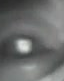

In [206]:
index = 200
h_offset_scale = 0.05
v_offset_scale = 0.05

img = cv2.imread(train_eye_shape_dataset.loc[index, 'file_name'])
eye_pos = [int(train_eye_shape_dataset.loc[index, 'left_eye_pt1_x_pos']), int(train_eye_shape_dataset.loc[index, 'left_eye_pt1_y_pos']),
           int(train_eye_shape_dataset.loc[index, 'left_eye_pt2_x_pos']), int(train_eye_shape_dataset.loc[index, 'left_eye_pt2_y_pos'])]

eye_pos[0] = int(eye_pos[0]-eye_pos[0]*h_offset_scale)
eye_pos[1] = int(eye_pos[1]-eye_pos[1]*v_offset_scale)
eye_pos[2] = int(eye_pos[2]+eye_pos[2]*h_offset_scale)
eye_pos[3] = int(eye_pos[3]+eye_pos[3]*v_offset_scale)


leye_img = img[eye_pos[1]:eye_pos[3], eye_pos[0]:eye_pos[2]]
display(Image.fromarray(leye_img))

In [231]:
type(train_eye_shape_dataset.loc[0, 'left_eye_opened'])

numpy.int64